<a href="https://colab.research.google.com/github/BB-3022/DeepLearning/blob/main/ex02_%EC%86%90%EA%B8%80%EC%94%A8%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98(%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 손글씨 데이터를 분류하는 딥러닝 모델을 설계해보자!
- 다중분류 딥러닝 모델링을 연습해보자

In [ ]:
# 기본라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 로딩

In [ ]:
# keras 에서 제공해주는 손글씨데이터 불러오기
from tensorflow.keras.datasets import mnist

In [ ]:
# 문제데이터와 정답데이터가 나뉘어 제공해주고 있다.
# 훈련용, 테스트용 데이터도 나뉘어 제공
(X_train, y_train),(X_test, y_test)=mnist.load_data()

In [ ]:
# 데이터 크기 확인
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# 훈련데이터 6만장, 테스트데이터 1만장
# 사진데이터 28 * 28 픽셀
# 픽셀 : 사진의 정보를 가지고있는 단위(작은 사각형 하나가 1픽셀)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


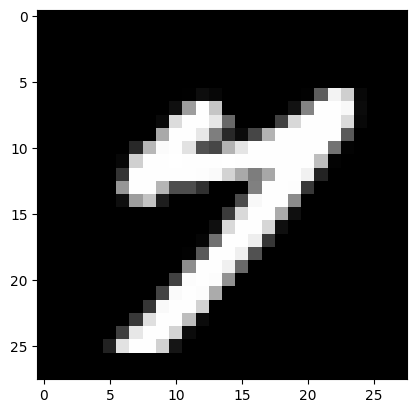

In [ ]:
# 사진데이터 확인
plt.imshow(X_train[1001], cmap='gray')
# 흑백사진
# 0~255 검정색의 정도를 숫자로 가진다.

In [ ]:
# 정답데이터 확인
np.unique(y_train) # 10개의 클래스를 가진다.

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### MLP 모델링
- 입력층의 구조, 출력층의 구조 고려
- 학습능력을 위한 중간층의 깊이 고려
- loss(오차), optimizer(최적화방법) 설정 해야 한다.

In [ ]:
# 딥러닝 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
# Dense : 퍼셉트론을 묶음으로 표현하는 클래스
# InputLayer : 입력층 설정
# Flatten : 2차원 사진 데이터를 1차원으로 표현하기 위한 클래스

In [ ]:
# 1. 신경망 설계

# 뼈대
digit_model = Sequential()

# 입력층
digit_model.add(InputLayer (input_shape = (28,28))) # 28*28의 2차원 데이터

# 중간층
digit_model.add(Flatten()) # 2차원의 사진데이터를 1차원으로 변경(선형모델을 위한 작업)
digit_model.add(Dense(units = 16, activation = 'relu'))
digit_model.add(Dense(units = 8, activation = 'relu'))
digit_model.add(Dense(units = 32, activation = 'relu'))
digit_model.add(Dense(units = 16, activation = 'relu'))
digit_model.add(Dense(units = 8, activation = 'relu'))

# 출력층
digit_model.add(Dense(units = 10, activation = 'softmax'))
# 다중분류는 클래스의 개수만큼 선형모델이 필요하다.
# 활성화함수 : softmax(클래스 개수만큼 확률값이 출력 -> 총합 1로 만들어주는 함수)

In [ ]:
# 2. 모델 학습 및 평가 방법 설정
digit_model.compile(loss = 'categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics = ['accuracy'])

In [ ]:
# 3. 모델 학습 및 시각화
h1 = digit_model.fit(X_train, y_train,
                     validation_split=0.2,
                     epochs=20)

# 문제발생!!
# 오류 확인 -> 정답데이터의 shape 가 일치하지 않음! (shape 가 다르면 비교 X)
# y_train 을 확인

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0768 - accuracy: 0.6502 - val_loss: 0.5977 - val_accuracy: 0.7965
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5738 - accuracy: 0.8365 - val_loss: 0.4660 - val_accuracy: 0.8686
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4852 - accuracy: 0.8647 - val_loss: 0.4356 - val_accuracy: 0.8822
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4307 - accuracy: 0.8792 - val_loss: 0.4067 - val_accuracy: 0.8901
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3853 - accuracy: 0.8936 - val_loss: 0.3658 - val_accuracy: 0.8994
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3574 - accuracy: 0.9026 - val_loss: 0.3439 - val_accuracy: 0.9047
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3381 - accuracy: 0.9075 - val_loss: 0.3142 - val_accuracy:

In [ ]:
# 정답데이터의 형태확인
y_train
# 실제 결과값(클래스 중 하나를 출력 -> 범주형)
# 모델링 결과 : 10개의 클래스에 대한 각각의 확률값
# 1개와 10개는 비교가 불가능 하다

# 해결방안 2가지
# 1. 정답데이터를 확률로 변경 (원 핫 인코딩과 비슷)
# 2. loss 함수를 변경 - keras에서 지원하는 자동으로 정답데이터를 알아서 확률로 계산해주는 방

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# 방법1. 정답데이터를 확률값으로 변경하기
# 모델의 예측값은 확률값으로 출력 / 정답데이터는 범주형데이터 비교(loss) 불가
# 우리가 직접 정답데이터를 범주형에서 확률값으로 변경 해주자!
from tensorflow.keras.utils import to_categorical
# 범주형데이터를 확률값으로 변경!
one_hot_y_train = to_categorical(y_train)
one_hot_y_train[0:2]
# 첫번째 데이터 5일 확률 100%, 두번째 데이터는 0일 확률 100%

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# 방법2. loss 함수를 'sparse_categorical_crossentropy'라고 변경
# 평가를 할 때 알아서 확률값으로 변경해서 계산
# 스스로 내부에서 범주값을 확률값으로 변경하는 작업을 수행 후 loss 값 계산
digit_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics = ['accuracy'])

# 2번 방법을 더 선호 한다.

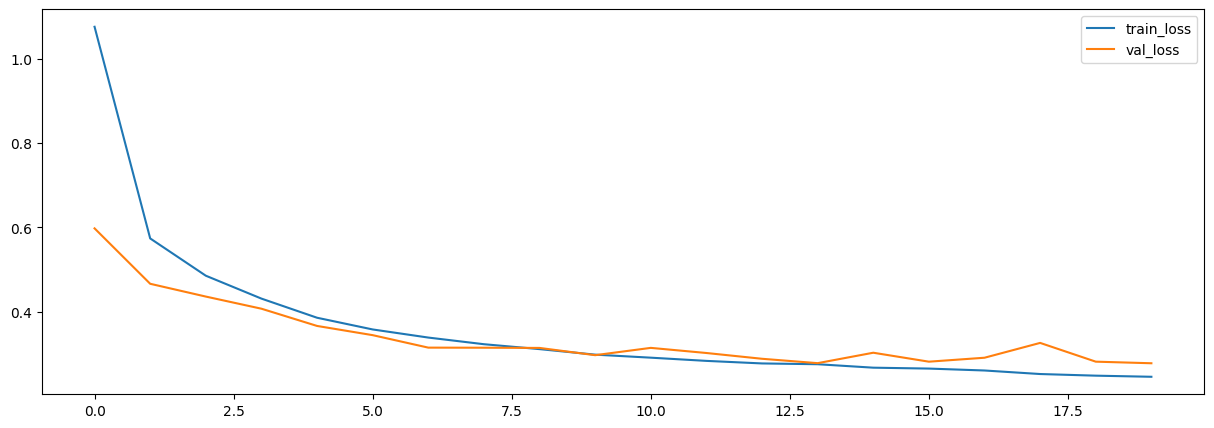

In [ ]:
# 학습결과 시각화
# loss
# val_loss
plt.figure(figsize = (15,5))
plt.plot(h1.history['loss'], label = 'train_loss')
plt.plot(h1.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()


In [ ]:
#4. 모델 예측 및 평가
digit_model.evaluate(X_test, y_test)
# 정확도 약 0.865
# relu 정확도 약 0.925

313/313 [==============================] - 0s 1ms/step - loss: 0.2726 - accuracy: 0.9285


[0.27255120873451233, 0.9284999966621399]

### 직접 작성한 손글씨 숫자 test 해보기

In [ ]:
# 파이썬에서 이미지를 처리하는 라이브러리
import PIL.Image as pimg

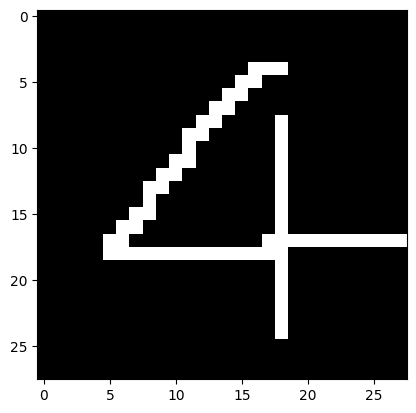

In [ ]:
img = pimg.open('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/손글씨/4.png').convert('L')
plt.imshow(img, cmap='gray')

In [ ]:
# 전처리
# 이미지타입을 배열로 변환
img = np.array(img)
img.shape

(28, 28)

In [ ]:
# 2차원 -> 1차원
test_img = img.reshape(1,28,28,1)
test_img.astype('float32')/255
test_img.shape

(1, 28, 28, 1)

In [ ]:
# 예측
digit_model.predict(test_img)
# 결과 : 10개의 확률로 출력


1/1 [==============================] - 0s 63ms/step


array([[0.24881741, 0.00283743, 0.5526416 , 0.0438966 , 0.01046528,
        0.048622  , 0.04237645, 0.01118124, 0.01447232, 0.02468973]],
      dtype=float32)